In [1]:
# Import necesssary packages
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [20]:
# Load the dataset
BP=pd.read_csv("blood_pressure.csv")
BP.head()

,age,job,blood_pressure
0,39,1,144
1,47,1,220
2,45,1,138
3,47,1,145
4,65,1,162


In [21]:
#Basic checks/EDA
BP.shape

(31, 3)

In [22]:
BP.isnull().sum()

age               0
job               0
blood_pressure    0
dtype: int64

In [23]:
BP.describe()

,age,job,blood_pressure
count,31.000000,31.000000,31.000000
mean,45.903226,0.709677,143.580645
std,15.636186,0.461414,22.954701
min,17.000000,0.000000,110.000000
25%,37.500000,0.000000,126.500000
50%,46.000000,1.000000,142.000000
75%,57.500000,1.000000,158.000000
max,69.000000,1.000000,220.000000


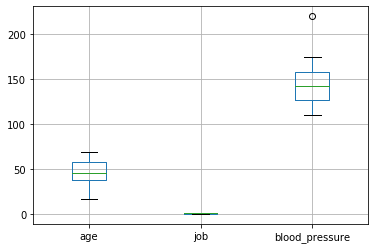

In [24]:
BP.boxplot()

In [25]:
BP.corr() # Checking the assumptions of Linear regression 1. Linearity of predictor values with target

,age,job,blood_pressure
age,1.000000,0.712100,0.681272
job,0.712100,1.000000,0.664757
blood_pressure,0.681272,0.664757,1.000000


 Range of Skewness , S<|1.96|
 Skewness AGE: -0.24636645318560205
 Skewness JOB: -0.9238697708743122
 Kurtosis AGE: -0.8633858065796312
 Kurtosis JOB: -1.146464646464645


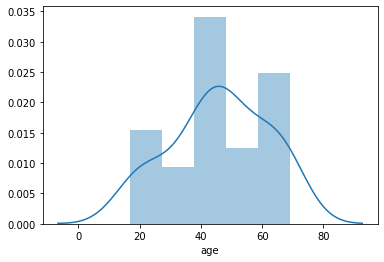

In [26]:
#2. Normality univariate multivariate 
%matplotlib inline
sb.distplot(BP.age)
print(" Range of Skewness , S<|1.96|")
print(" Skewness AGE: {}".format(stats.skew(BP.age)))
print(" Skewness JOB: {}".format(stats.skew(BP.job)))
print(" Kurtosis AGE: {}".format(stats.kurtosis(BP.age)))
print(" Kurtosis JOB: {}".format(stats.kurtosis(BP.job)))
#Both age and job pas normality test

In [27]:
# Define X and y
X=BP.loc[:,['age','job']]
y=BP.blood_pressure

In [28]:
X.head(2)

,age,job
0,39,1
1,47,1


In [29]:
# Train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=12)

In [30]:
print("X_train Shape = ",X_train.shape)
print("X_test Shape = ",X_test.shape)
print("y_train Shape = ",y_train.shape)
print("y_test Shape = ",y_test.shape)

X_train Shape =  (23, 2)
X_test Shape =  (8, 2)
y_train Shape =  (23,)
y_test Shape =  (8,)


In [31]:
# Define the model
model=LinearRegression()

In [32]:
# Train the model
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_predict=model.predict(X_test)

In [34]:
r2_score(y_test,y_predict) # Model Fitment efficiency

0.3125987231633631

# Optimize Linear Regression

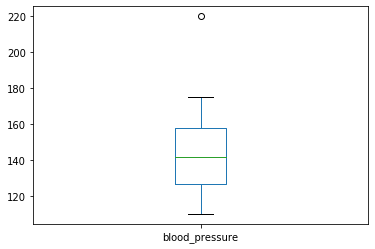

In [37]:
BP.blood_pressure.plot(kind="box")

In [38]:
BP[BP.blood_pressure==BP.blood_pressure.max()]

,age,job,blood_pressure
1,47,1,220


In [40]:
BP_outlier=BP.drop(index=1)
BP_outlier

,age,job,blood_pressure
0,39,1,144
2,45,1,138
3,47,1,145
4,65,1,162
5,46,1,142
6,67,1,170
7,42,0,124
8,67,1,158
9,56,1,154
10,64,1,162


In [42]:
# Define X and y
X=BP_outlier.loc[:,['age','job']]
y=BP_outlier.blood_pressure
X.head(2)

,age,job
0,39,1
2,45,1


In [43]:
# Train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=12)

In [44]:
print("X_train Shape = ",X_train.shape)
print("X_test Shape = ",X_test.shape)
print("y_train Shape = ",y_train.shape)
print("y_test Shape = ",y_test.shape)

X_train Shape =  (22, 2)
X_test Shape =  (8, 2)
y_train Shape =  (22,)
y_test Shape =  (8,)


In [45]:
model=LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
r2_score(y_test,y_predict)# Model fitment efficiency

0.2909059558786439

In [46]:
y_test

8     158
23    120
19    124
15    130
2     138
22    120
5     142
16    135
Name: blood_pressure, dtype: int64

In [47]:
y_predict

array([162.54616582, 112.78326273, 111.29065445, 148.36638714,
       146.12747471, 126.21673727, 146.87377885, 146.12747471])